<a href="https://colab.research.google.com/github/akhila1507/Algorithmic-Trading-Strategy-Development-/blob/main/Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Motive behind the Project**

The project focused on generating the Minimum Variance Portfolio on diversely selected Indian stocks. It gave the team a deeper idea on the concepts they learnt from the book like CAPM, Sharpe ratio etc. It was the first project of our team in the field of Quantitative Finance and this really gave us a deeper insight of the practical work that happens in the Industrial level.

# **Install the Packages**

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.4/51.4 KB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 9.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

# **Import the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

%matplotlib inline

# **Choosing of the Stocks**

So basically what I did is I selected 5 stocks on total from 5 different sectors. The reason behind this is it increases the diversification and decreases the correlation between the individual stocks as they arent from the same sector.

# **Downloading of the Stocks**

In [ ]:
stocks=['HDFC.NS','ASHOKLEY.NS','BAJFINANCE.NS','BRITANNIA.NS','WIPRO.NS']

In [ ]:
df=yf.download(stocks,start='2017-01-01',end='2018-12-31',progress=False)['Adj Close']
df.sort_index(inplace=True)
df

,ASHOKLEY.NS,BAJFINANCE.NS,BRITANNIA.NS,HDFC.NS,WIPRO.NS
Date,,,,,
2017-01-02 00:00:00+05:30,69.095886,858.305298,1294.795776,1120.961304,172.178101
2017-01-03 00:00:00+05:30,69.138542,872.067017,1288.425781,1118.106201,170.516724
2017-01-04 00:00:00+05:30,71.527054,860.130493,1279.521606,1116.356323,173.656876
2017-01-05 00:00:00+05:30,71.612350,887.604431,1285.532471,1121.053345,175.409500
2017-01-06 00:00:00+05:30,72.763954,866.591980,1298.608398,1125.796631,171.593872
...,...,...,...,...,...
2018-12-21 00:00:00+05:30,94.685204,2567.272949,2848.175537,1833.614746,237.025681
2018-12-24 00:00:00+05:30,94.011124,2541.166748,2830.601562,1789.905762,240.410706
2018-12-26 00:00:00+05:30,93.381996,2543.643799,2820.011475,1819.264648,240.005966


In [ ]:
returns=df.pct_change()
returns

,ASHOKLEY.NS,BAJFINANCE.NS,BRITANNIA.NS,HDFC.NS,WIPRO.NS
Date,,,,,
2017-01-02 00:00:00+05:30,NaN,NaN,NaN,NaN,NaN
2017-01-03 00:00:00+05:30,0.000617,0.016034,-0.004920,-0.002547,-0.009649
2017-01-04 00:00:00+05:30,0.034547,-0.013688,-0.006911,-0.001565,0.018416
2017-01-05 00:00:00+05:30,0.001193,0.031942,0.004698,0.004207,0.010092
2017-01-06 00:00:00+05:30,0.016081,-0.023673,0.010172,0.004231,-0.021753
...,...,...,...,...,...
2018-12-21 00:00:00+05:30,-0.007536,-0.000058,-0.016100,-0.013217,-0.033458
2018-12-24 00:00:00+05:30,-0.007119,-0.010169,-0.006170,-0.023838,0.014281
2018-12-26 00:00:00+05:30,-0.006692,0.000975,-0.003741,0.016402,-0.001684


In [ ]:
mean_daily_returns=returns.mean()
mean_daily_returns

ASHOKLEY.NS      0.000825
BAJFINANCE.NS    0.002478
BRITANNIA.NS     0.001672
HDFC.NS          0.001127
WIPRO.NS         0.000783
dtype: float64

In [ ]:
cov_matrix=returns.cov()
cov_matrix

,ASHOKLEY.NS,BAJFINANCE.NS,BRITANNIA.NS,HDFC.NS,WIPRO.NS
ASHOKLEY.NS,0.000466,0.000124,0.000057,0.000046,0.000010
BAJFINANCE.NS,0.000124,0.000435,0.000072,0.000097,0.000015
BRITANNIA.NS,0.000057,0.000072,0.000166,0.000043,0.000015
HDFC.NS,0.000046,0.000097,0.000043,0.000188,0.000009
WIPRO.NS,0.000010,0.000015,0.000015,0.000009,0.000169


In [ ]:
num_portfolios = 30000
results = np.zeros((3+len(stocks),num_portfolios))

# **Optimization of the Weights**

In [ ]:
for i in range(num_portfolios):
    
    weights = np.array(np.random.random(5))
    
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4]])
results_frame

,ret,stdev,sharpe,HDFC.NS,ASHOKLEY.NS,BAJFINANCE.NS,BRITANNIA.NS,WIPRO.NS
0,0.500649,0.207769,2.409646,0.029687,0.481444,0.416101,0.047323,0.025445
1,0.351209,0.168947,2.078808,0.256465,0.226460,0.163208,0.205912,0.147954
2,0.371183,0.157136,2.362172,0.148858,0.255921,0.269319,0.029655,0.296246
3,0.389522,0.164099,2.373705,0.013636,0.293885,0.164227,0.342883,0.185370
4,0.424851,0.187377,2.267368,0.205858,0.311052,0.376546,0.093409,0.013136
...,...,...,...,...,...,...,...,...
29995,0.336123,0.179377,1.873837,0.337461,0.138993,0.248456,0.232889,0.042200
29996,0.364777,0.171588,2.125893,0.209672,0.314480,0.104695,0.085238,0.285914
29997,0.411642,0.212362,1.938398,0.297931,0.436561,0.086722,0.060002,0.118783
29998,0.347594,0.139403,2.493455,0.004636,0.132420,0.368842,0.126745,0.367358


In [ ]:
max_sharpe_point = results_frame.iloc[results_frame['sharpe'].idxmax()]
max_sharpe_point

ret              0.408091
stdev            0.155989
sharpe           2.616150
HDFC.NS          0.008221
ASHOKLEY.NS      0.241295
BAJFINANCE.NS    0.428651
BRITANNIA.NS     0.133271
WIPRO.NS         0.188563
Name: 13827, dtype: float64

In [ ]:
min_vol_point = results_frame.iloc[results_frame['stdev'].idxmin()]
min_vol_point

ret              0.290234
stdev            0.132018
sharpe           2.198454
HDFC.NS          0.065523
ASHOKLEY.NS      0.014776
BAJFINANCE.NS    0.284475
BRITANNIA.NS     0.255594
WIPRO.NS         0.379633
Name: 1263, dtype: float64

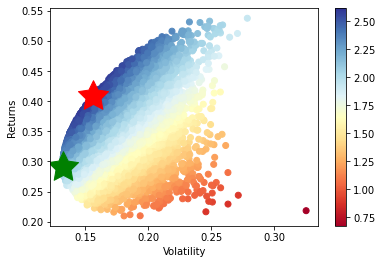

In [ ]:
#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_point[1],max_sharpe_point[0],marker=(5,1,0),color='r',s=1000)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_point[1],min_vol_point[0],marker=(5,1,0),color='g',s=1000)

# **Testing the Weights for the Following Year**

In [ ]:
test_df=yf.download(stocks,start='2019-01-01',end='2020-12-31',progress=False)['Adj Close']
test_df.sort_index(inplace=True)
test_df

,ASHOKLEY.NS,BAJFINANCE.NS,BRITANNIA.NS,HDFC.NS,WIPRO.NS
Date,,,,,
2019-01-01 00:00:00+05:30,92.123718,2632.266113,2832.883789,1890.450562,240.373917
2019-01-02 00:00:00+05:30,89.831863,2589.862061,2845.482422,1863.773560,239.564453
2019-01-03 00:00:00+05:30,88.214066,2562.269775,2862.873779,1822.558228,239.527664
2019-01-04 00:00:00+05:30,87.000740,2552.213623,2850.822998,1856.198486,238.754974
2019-01-07 00:00:00+05:30,83.989861,2529.971436,2870.085693,1856.480713,238.607819
...,...,...,...,...,...
2020-12-23 00:00:00+05:30,93.608849,5062.258301,3439.009277,2351.123535,380.888947
2020-12-24 00:00:00+05:30,93.658012,5157.755371,3432.273926,2402.097412,377.579468
2020-12-28 00:00:00+05:30,93.707191,5176.854980,3418.329590,2422.937500,378.270966


In [ ]:
test_returns=test_df.pct_change()
test_mean_daily_returns=test_returns.mean()
test_cov_matrix=test_returns.cov()
test_weights=[max_sharpe_point[3],max_sharpe_point[4],max_sharpe_point[5],max_sharpe_point[6],max_sharpe_point[7]]
test_weights=np.array(test_weights)
test_weights

array([0.00822058, 0.24129491, 0.4286505 , 0.13327063, 0.18856338])

In [ ]:
test_portfolio_return = np.sum(mean_daily_returns * test_weights) * 252
test_portfolio_std_dev = np.sqrt(np.dot(test_weights.T,np.dot(test_cov_matrix, test_weights))) * np.sqrt(252)
print('test return is '+str(test_portfolio_return))
print('test std dev is '+str(test_portfolio_std_dev))

test return is 0.40809117548922974
test std dev is 0.2770103089268183


In [ ]:
test_sharpe_ratio=test_portfolio_return/test_portfolio_std_dev
print('test sharpe ratio is '+str(test_sharpe_ratio))

test sharpe ratio is 1.4731985140561714


So on testing the portfolio weights on the following year, we see a good sharpe ratio of **1.4732**.

# **Impact of Increasing the number of Stocks**

As the number of securities added to a portfolio increases, the standard deviation of the portfolio becomes smaller and smaller. Hence an investor can make the portfolio risk arbitrarily small by including a large number of securities with negative or zero correlation in the portfolio.

# **Why are calculating the weights by optimization and not giving equal weightage to every stock?**

So suppose if all the stocks are given equal weightage , then the overall portfolio will be dependent equally on each individual stock. So the risk of all the individual stocks have the same impact on the portfolio. whereas by calculating the weights by optimization results in assigning weights in such a way that the portfolio return increases and the standard deviation decreases.

# **Optimization techniques used by Mutual Funds currently**

An optimization technique used by the mutual funds is mean-variance optimization.

# **Parameters used for checking the accuracy**

I used return percentage and the standard devaiation(volatality) for checking the accuracy. I also used the sharpe ratio.